In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, ConfusionMatrixDisplay, confusion_matrix

In [2]:
df1 = pd.read_csv('03_Cleaned_File(Data Preprocessing).csv')

In [3]:
df1.head()

,CustomerId,Surname,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,101348.88,0.00,1,1,2,1,1,0,0
1,15647311,Hill,608,0,41,112542.58,83807.86,1,1,1,1,0,0,1
2,15619304,Onio,502,0,42,113931.57,159660.80,3,0,8,0,1,0,0
3,15701354,Boni,699,0,39,93826.63,0.00,2,0,1,0,0,0,0
4,15737888,Mitchell,850,0,43,79084.10,125510.82,1,1,2,1,0,0,1


In [4]:
X = df1.drop(columns = ['CustomerId', 'Surname', 'Exited'])
y = df1['Exited']

In [5]:
y.value_counts(normalize = True)

Exited
0    0.796239
1    0.203761
Name: proportion, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
scaler = StandardScaler()
num_features = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'Tenure']
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [8]:
## By default it is Post Pruning technique
treemodel = DecisionTreeClassifier(max_depth = 2)

In [9]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.53\ngini = 0.323\nsamples = 7997\nvalue = [6379, 1618]'),
 Text(0.25, 0.5, 'x[5] <= 1.666\ngini = 0.224\nsamples = 6124\nvalue = [5339.0, 785.0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.198\nsamples = 5979\nvalue = [5312, 667]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.303\nsamples = 145\nvalue = [27, 118]'),
 Text(0.75, 0.5, 'x[6] <= 0.5\ngini = 0.494\nsamples = 1873\nvalue = [1040, 833]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.443\nsamples = 794\nvalue = [263, 531]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.403\nsamples = 1079\nvalue = [777.0, 302.0]')]

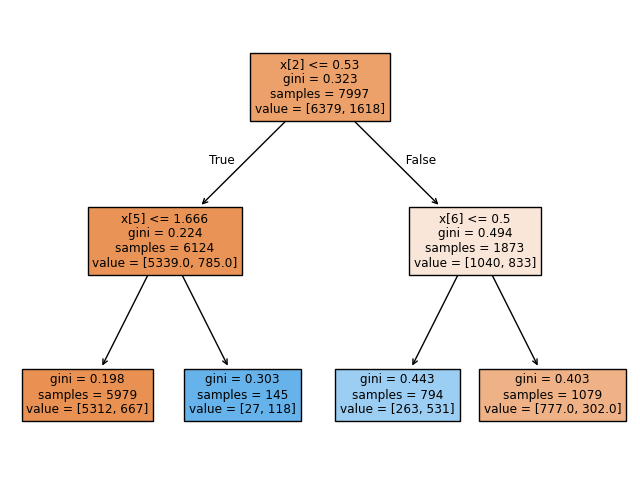

In [10]:
# Constructing Decision tree
from sklearn import tree
plt.figure(figsize = (8, 6))
tree.plot_tree(treemodel, filled = True) #CART tree

##### Since my dataset is very large, we cannot directly tells that upto which depth we have to grow the tree, So we will directly go with the GridSearchCV concept

In [11]:
dt = DecisionTreeClassifier(random_state=42)

In [12]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    # 'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [13]:
scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1'
}

grid_search = GridSearchCV(estimator = dt,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = scoring,
                           refit = 'recall'
)


In [14]:
grid_search.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [15]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [16]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1357,  224],
       [ 201,  218]], dtype=int64)

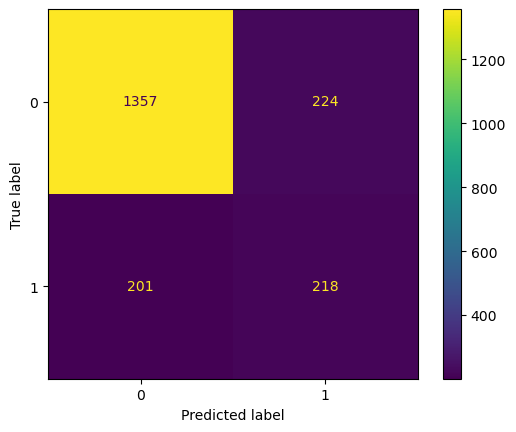

In [18]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [19]:
class0_accuracy = cm[0,0] / cm[0].sum()
class1_accuracy = cm[1,1] / cm[1].sum()
print(f"Class 0 Accuracy: {class0_accuracy:.2f}")
print(f"Class 1 Accuracy: {class1_accuracy:.2f}")

Class 0 Accuracy: 0.86
Class 1 Accuracy: 0.52


In [20]:
print(f'Accuracy : {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision : {precision_score(y_test, y_pred):.2f}')
print(f'Recall : {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score : {f1_score(y_test, y_pred):.2f}')

Accuracy : 0.79
Precision : 0.49
Recall : 0.52
F1 Score : 0.51


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1581
           1       0.49      0.52      0.51       419

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.69      2000
weighted avg       0.79      0.79      0.79      2000

